# Logistic Regression


Logistic regression is a binary classification algorithm. It classifies an instance to either class one or class two using maximum likelihood. If the probability of an instance is predicted to be above a given threshold (typically 0.5), the model classifies that instance as 1, otherwise a 0. 

 
**y =  1 if p ≥ 0 . 5**
     
**y =  0 if p < 0 . 5**
    
Like linear regression, the model computes weights and biases. However instead of making a continuous prediction, the model uses log(odds) to make predictions. The log odds is then passed through a logistic function which converts the log odds of an instance into a probability. Larger values of the log likelihood correspond to a better prediction. 


**p(X) = eβ0 + β1X1 + β2X2 + … + βpXp /  (1 + eβ0 + β1X1 + β2X2+ βpXp)**


# Training and Cost Function

The training process involves finding partial derivatives of the weights and biases with respect to the cost function. This process is carried out through an optimization algorithm like gradient descent. The optimizer always finds the global minimum with logistic regression.

  
# Logistic Regression Assumptions


1. The response variable must be binary

2. No multicollinearity amongst predictor variables

3. No outliers

4. Assumption of linearity

# Hyperparameters

The hyperparameters for a logistic regression model include C, penalty and solver. 

- C ( the inverse of alpha) is used to control regularization. Higher values of C reduce regularization.

- L1 L2 and Elasticnet regularization can be employed to control overfitting.

- 'solver', an optimization algorithm.

# More Notes

There are several approaches to apply logistic regression to multiple classes. One approach is to apply several logistic regression models for each class (one vs all technique). Another approach is to generalize the concept over other models such as multinomial logistic regression or SoftMax regression.


# 1. Libraries

In [2]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [4]:
# Import Data
dataset = pd.read_csv('Social_Network_Ads.csv')
dataset.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


# 2. Preprocessing

In [11]:
# Create subsets of input features and response variable.
X = dataset.iloc[:, :-1].values
y = dataset['Purchased'].values

# Training and Testing subsets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 911)

# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print('Standardized feature Mean:',  X_train.mean().round())
print('Standardized feature SD :',   X_train.std().round())

Standardized feature Mean: 0.0
Standardized feature SD : 1.0


# 3. Training

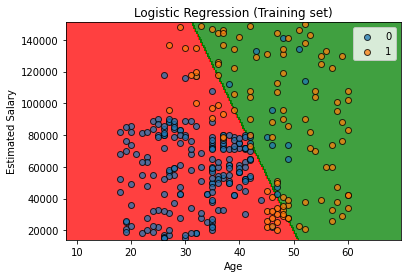

In [12]:
# Initialize Logistic Regression 
lgr = LogisticRegression(random_state = 0, penalty='l2', C=1.0)

# Fit the model
lgr.fit(X_train, y_train)

# Visualize Training Results 
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, lgr.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], cmap = ListedColormap(('red', 'black'))(i),edgecolor = 'black',
            linewidth = 1,
            alpha = 0.75, label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [107]:
# Extracting Coefficients and Intercepts
lgr.intercept_, lgr.coef_

(array([-1.23800385]), array([[2.34099896, 1.10206178]]))

# 3. Testing

In [50]:
# Predicting a new result using age 40 and salary 87000
print(classifier.predict(sc.transform([[40,87000]])))
lgr.predict_proba(sc.transform([[40,87000]]))

# Predicting the Test set results
y_pred = lgr.predict(X_test)

# Classification Accuracy
print('Classification Accuracy :', accuracy_score(y_test, y_pred))

[0]
Classification Accuracy : 0.85


# 4. K-Fold Cross Validation

In [18]:
# Lets deploy 10 fold cross validation
accuracies = cross_val_score(estimator = lgr,
                             X = X,
                             y = y,
                             cv = 10,
                             scoring = 'accuracy')

# Cross validation accuracy and standard deviation
print(accuracies)
print("Accuracy: {:.3f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.3f} %".format(accuracies.std()*100))

[0.65  0.65  0.65  0.65  0.65  0.65  0.65  0.625 0.625 0.625]
Accuracy: 64.250 %
Standard Deviation: 1.146 %


# 5. Hyperparametric Tuning



In [22]:
# Deploying a Grid Search to find the best hyperparamters
parameters = [{'C': [1.0, 0.1, 0.01],
              'penalty': ['l2'],
              'solver': ['liblinear', 'lbfgs', 'sag']}]

# Configure GridSearchCV
grid_search = GridSearchCV(estimator = lgr,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)

# Extract Tuned Parameters and Predictive Accuracy
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
tuned_parameters = grid_search.best_params_

# Print Results
print("Best Accuracy: {:.2f} %".format(grid_search.best_score_*100))
print("Best Parameters:", tuned_parameters)

Best Accuracy: 85.94 %
Best Parameters: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}


# 6. Evaluation Metrics

In [25]:
# Confusion Matrix/AUC/Classification Report 

def evaluate_model(lgr, X_test):
    
    y_pred = lgr.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    clr = classification_report(y_test, y_pred, target_names=["NEGATIVE", "POSITIVE"])
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
    plt.xticks(ticks=np.arange(2) + 0.6, labels=["NEGATIVE", "POSITIVE"])
    plt.yticks(ticks=np.arange(2) + 0.6, labels=["NEGATIVE", "POSITIVE"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()
    
    print("Classification Report:\n----------------------\n", clr)
    
    
    # ROC/AUC Curve
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
    plt.plot(fpr, tpr, c = 'green', linewidth = 3, alpha = 0.75)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.show()
    
    
    # Visualising the Testing Results
    X_set, y_set = sc.inverse_transform(X_test), y_test
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                         np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
    plt.contourf(X1, X2, lgr.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
                 alpha = 0.75, cmap = ListedColormap(('red', 'green')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], cmap = ListedColormap(('red', 'green'))(i),edgecolor = 'black',
            linewidth = 1,
            alpha = 0.75, label = j)
    plt.title('Logistic Regression (Test set)')
    plt.xlabel('Age')
    plt.ylabel('Estimated Salary')
    plt.legend()
    plt.show()

In [26]:
evaluate_model(lgr, X_test)

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

# Softmax Regression

In [88]:
softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10)
softmax_reg.fit(X_train, y_train)
print(softmax_reg.predict(sc.transform([[40,87000]])))
softmax_reg.predict_proba(sc.transform([[40,87000]]))

[0]


array([[0.51073581, 0.48926419]])